<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/bankChurnWithandWO_SMOTEandTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
df = df.drop('customer_id',axis=1)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


In [ ]:
df['country'].value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [4]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [5]:
df = pd.get_dummies(df, columns=['country'], dtype=int)

In [6]:
encoded_df = df
encoded_df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [7]:
y = encoded_df['churn']
y

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [8]:
X = encoded_df.drop('churn', axis=1)
X

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,0,1,0


<Axes: >

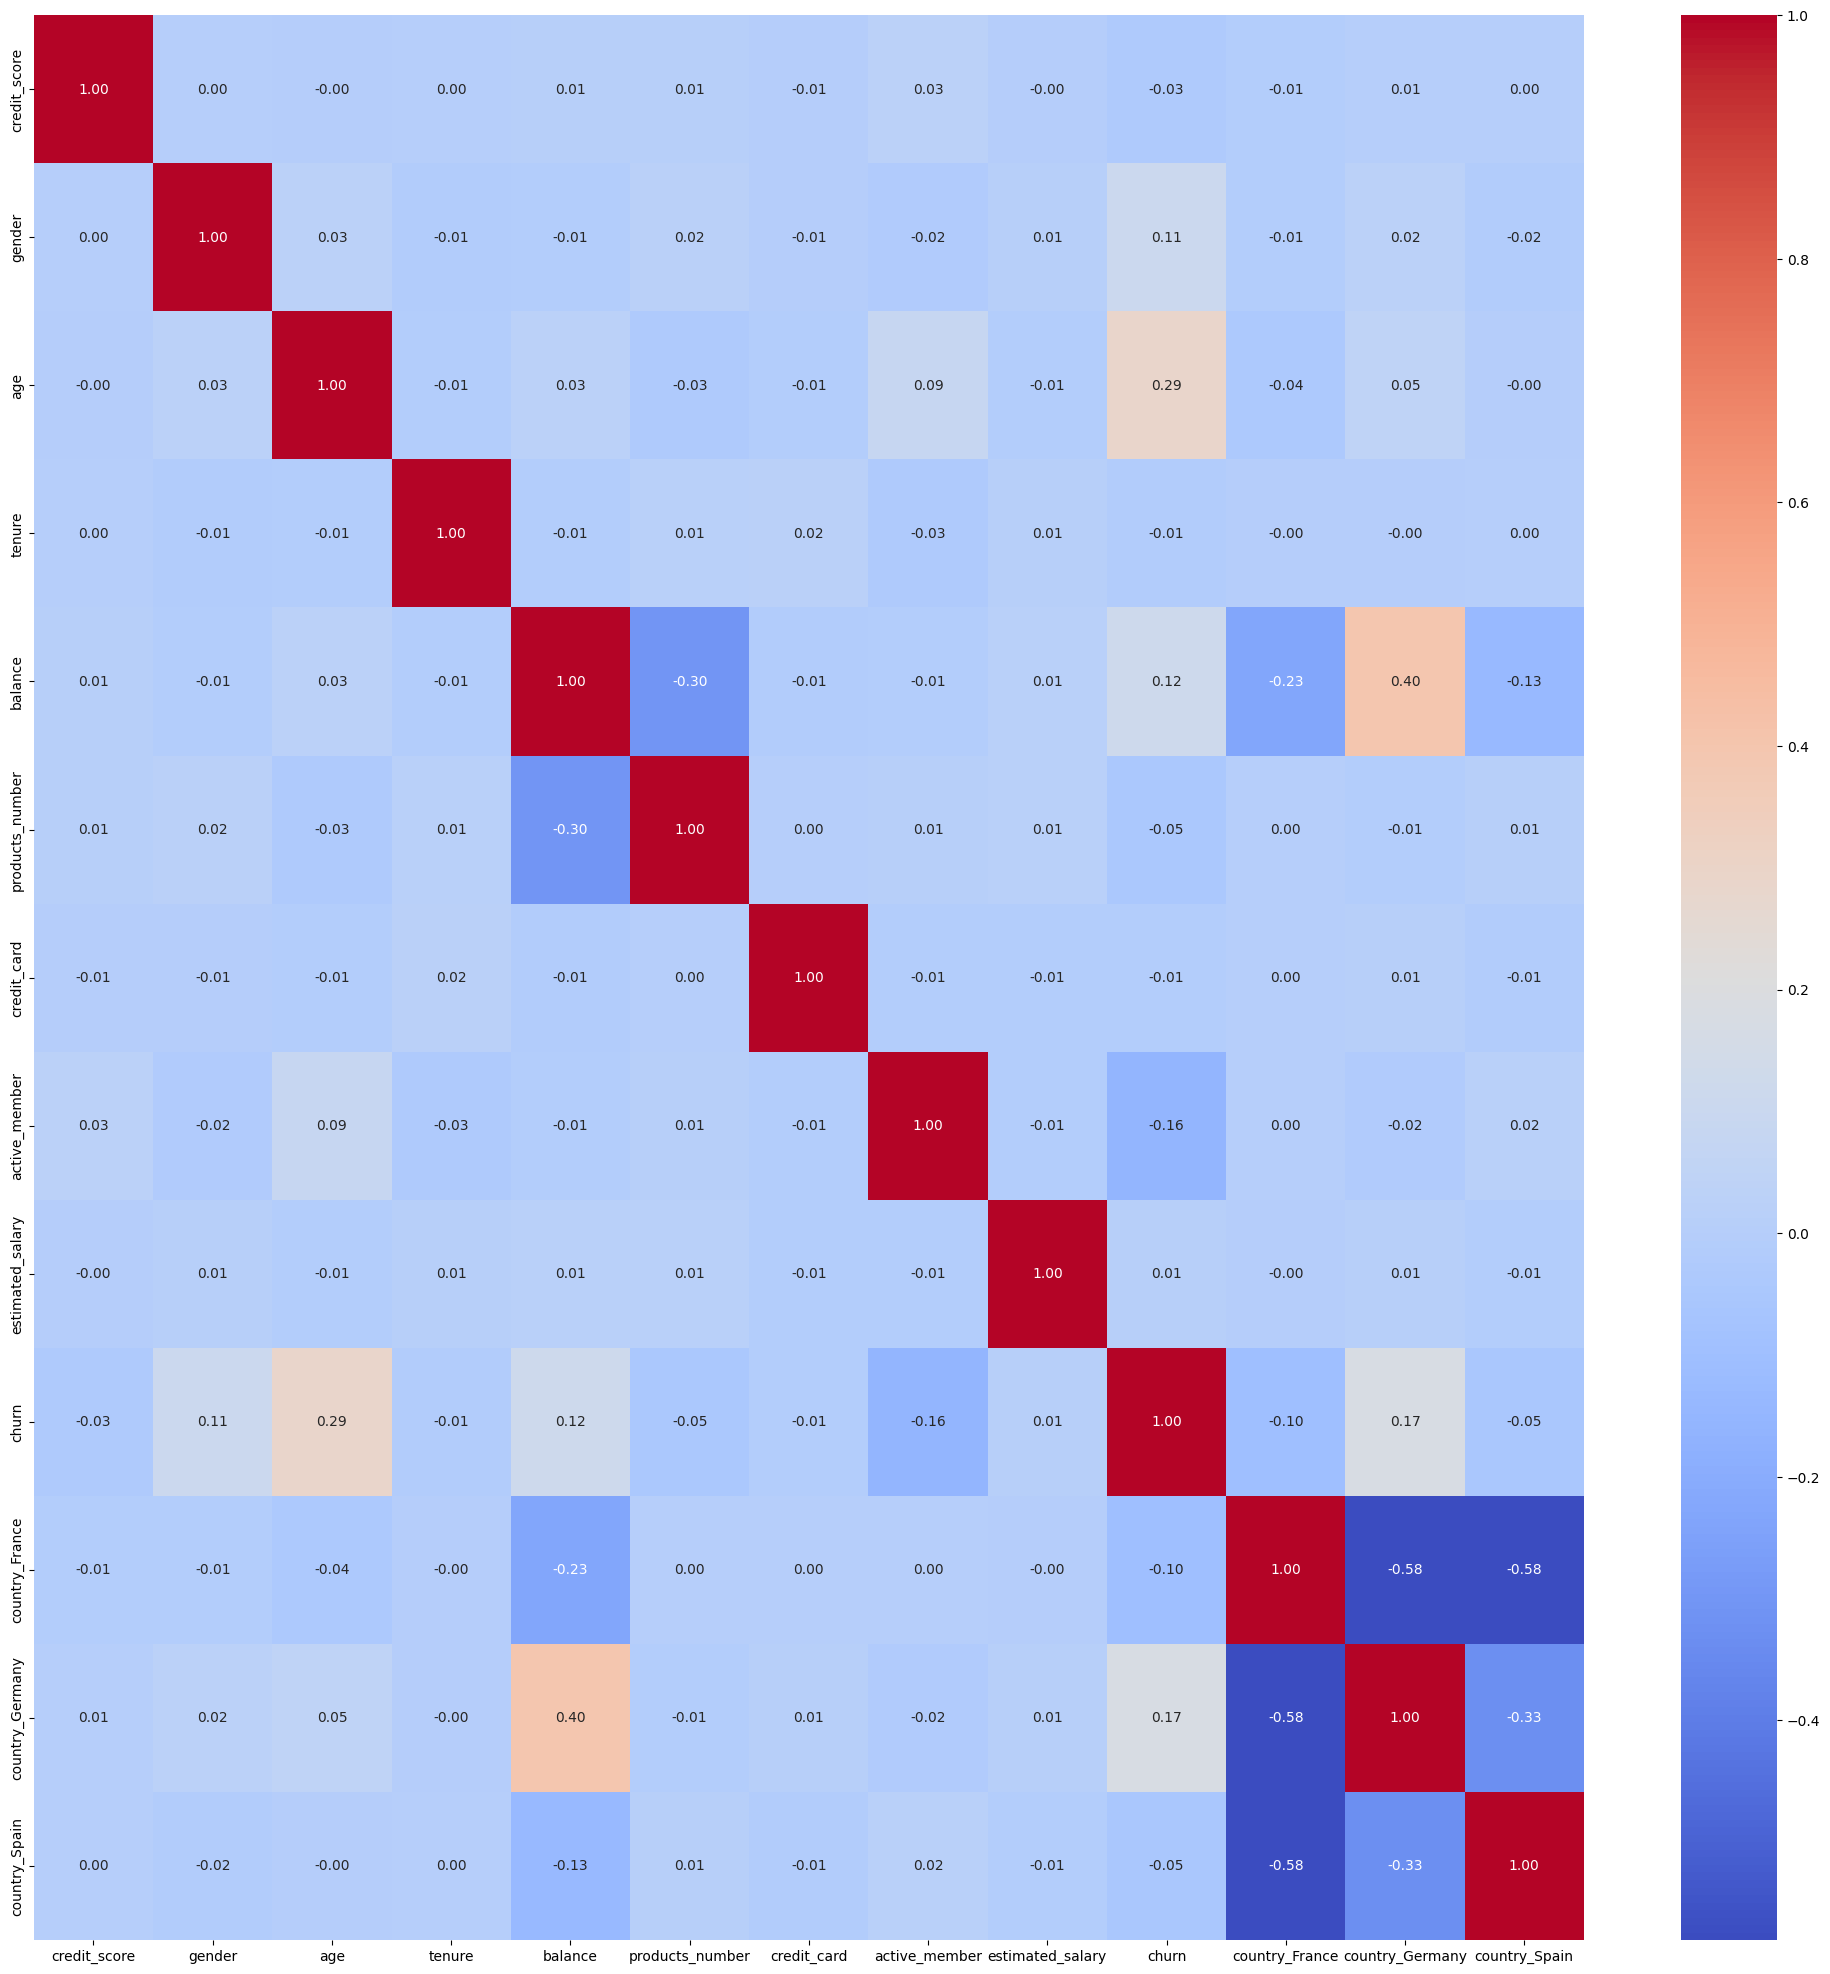

In [ ]:
corr = encoded_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [ ]:
correlation = encoded_df.corr()['churn'].drop('churn')
correlation.sort_values(ascending=False)

,churn
age,0.285323
country_Germany,0.173488
balance,0.118533
gender,0.106512
estimated_salary,0.012097
credit_card,-0.007138
tenure,-0.014001
credit_score,-0.027094
products_number,-0.047820
country_Spain,-0.052667


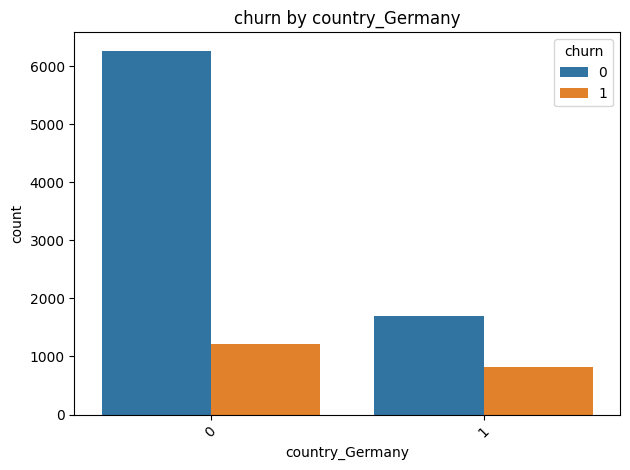

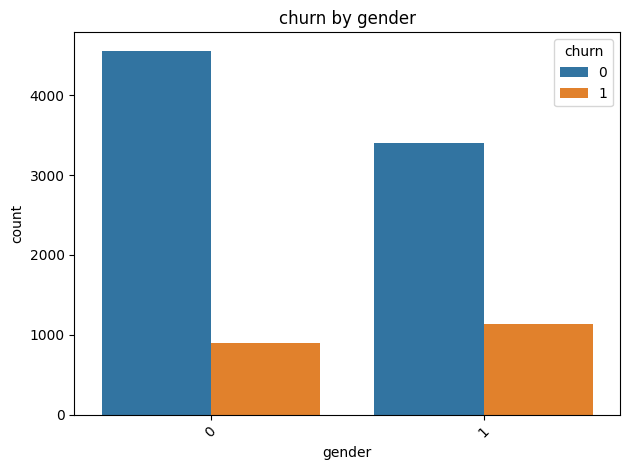

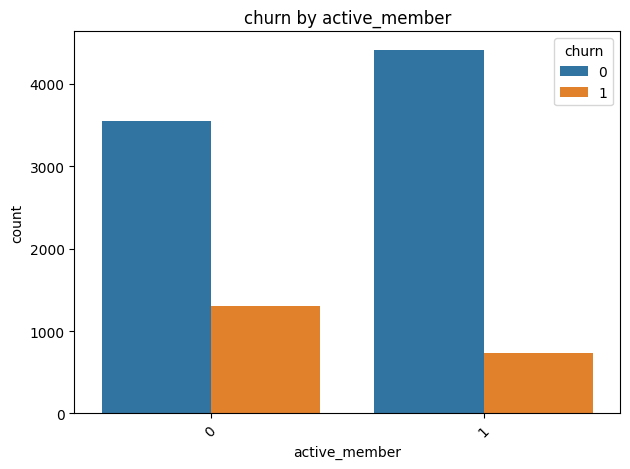

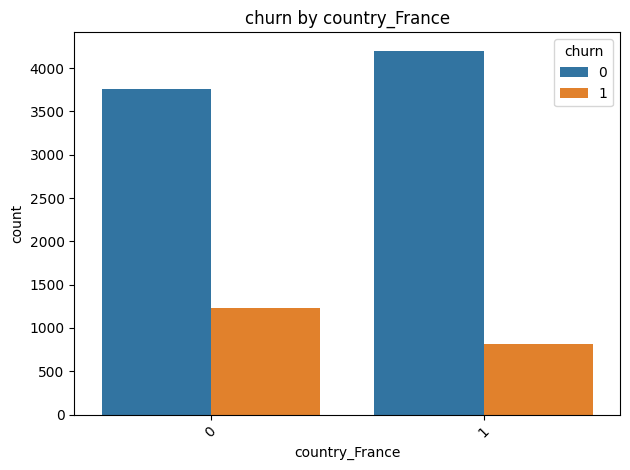

In [9]:
features = [
    'country_Germany',
    'gender',
    'active_member',
    'country_France'
]

for col in features:
    sns.countplot(data=encoded_df, x=col, hue='churn')
    plt.title(f'churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

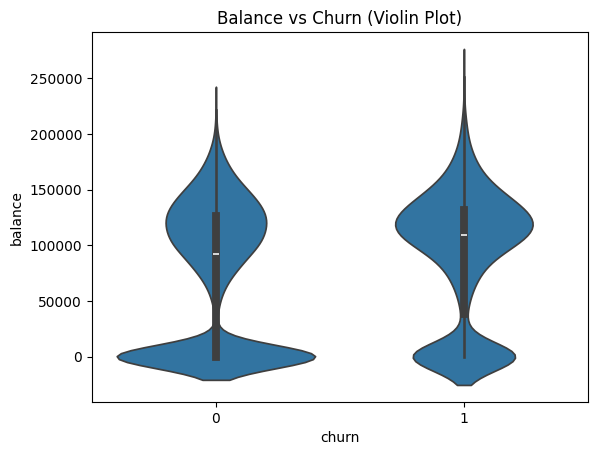

In [ ]:
sns.violinplot(data=encoded_df, x='churn', y='balance')
plt.title('Balance vs Churn (Violin Plot)')
plt.show()

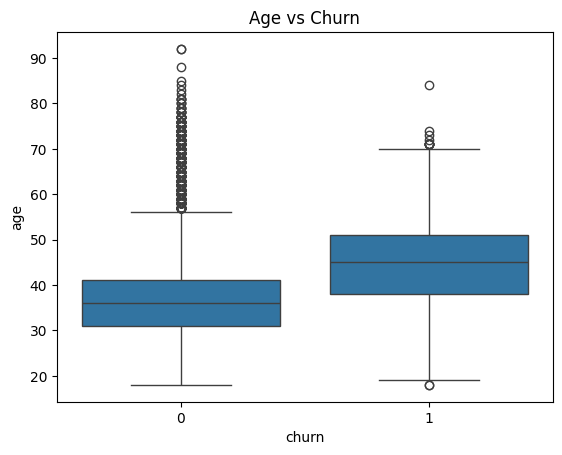

In [ ]:
sns.boxplot(data=encoded_df, x='churn', y='age')
plt.title('Age vs Churn')
plt.show()

# Without SMOTE


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled


(array([[-0.34459497,  1.09823226, -0.65674999, ..., -1.00171576,
         -0.57559072,  1.73073215],
        [-0.09518109,  1.09823226, -0.46637979, ..., -1.00171576,
          1.73734559, -0.57779016],
        [-0.94734518, -0.91055421, -0.56156489, ...,  0.99828718,
         -0.57559072, -0.57779016],
        ...,
        [ 0.86090545,  1.09823226, -0.08563939, ...,  0.99828718,
         -0.57559072, -0.57779016],
        [ 0.15423279, -0.91055421,  0.39028611, ...,  0.99828718,
         -0.57559072, -0.57779016],
        [ 0.46600014, -0.91055421,  1.1517669 , ..., -1.00171576,
          1.73734559, -0.57779016]]),
 array([[-0.5836166 , -0.91055421, -0.65674999, ..., -1.00171576,
          1.73734559, -0.57779016],
        [-0.30302599, -0.91055421,  0.39028611, ...,  0.99828718,
         -0.57559072, -0.57779016],
        [-0.53165538,  1.09823226,  0.48547121, ..., -1.00171576,
         -0.57559072,  1.73073215],
        ...,
        [-0.44851742, -0.91055421, -0.65674999, ...,  

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    logistic_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = logistic_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82357143 0.80285714 0.81571429 0.79571429 0.81      ]
Mean Accuracy: 0.8096
Standard Deviation: 0.0097

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1121
           1       0.64      0.27      0.38       279

    accuracy                           0.82      1400
   macro avg       0.74      0.62      0.64      1400
weighted avg       0.80      0.82      0.79      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1099
           1       0.62      0.22      0.32       301

    accuracy                           0.80      1400
   macro avg       0.72      0.59      0.60      1400
weighted avg       0.78      0.80      0.76      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1123
       

In [ ]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    logistic_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = logistic_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.80642857 0.80428571 0.81142857 0.81428571 0.80714286]
Mean Accuracy: 0.8087
Standard Deviation: 0.0036

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1121
           1       0.64      0.27      0.38       279

    accuracy                           0.82      1400
   macro avg       0.74      0.62      0.64      1400
weighted avg       0.80      0.82      0.79      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1099
           1       0.62      0.22      0.32       301

    accuracy                           0.80      1400
   macro avg       0.72      0.59      0.60      1400
weighted avg       0.78      0.80      0.76      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1123
       

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    knn_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = knn_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82571429 0.81214286 0.82428571 0.82714286 0.83071429]
Mean Accuracy: 0.8240
Standard Deviation: 0.0063

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1121
           1       0.60      0.37      0.46       279

    accuracy                           0.83      1400
   macro avg       0.73      0.65      0.68      1400
weighted avg       0.81      0.83      0.81      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1099
           1       0.61      0.35      0.45       301

    accuracy                           0.81      1400
   macro avg       0.73      0.65      0.67      1400
weighted avg       0.79      0.81      0.79      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1123
       

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    knn_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = knn_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.83071429 0.83357143 0.82428571 0.80642857 0.81642857]
Mean Accuracy: 0.8223
Standard Deviation: 0.0099

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1121
           1       0.60      0.37      0.46       279

    accuracy                           0.83      1400
   macro avg       0.73      0.65      0.68      1400
weighted avg       0.81      0.83      0.81      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1099
           1       0.61      0.35      0.45       301

    accuracy                           0.81      1400
   macro avg       0.73      0.65      0.67      1400
weighted avg       0.79      0.81      0.79      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1123
       

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    svc_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = svc_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.855      0.845      0.855      0.845      0.86285714]
Mean Accuracy: 0.8526
Standard Deviation: 0.0068

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1121
           1       0.79      0.37      0.51       279

    accuracy                           0.85      1400
   macro avg       0.82      0.67      0.71      1400
weighted avg       0.85      0.85      0.83      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1099
           1       0.82      0.36      0.50       301

    accuracy                           0.84      1400
   macro avg       0.84      0.67      0.70      1400
weighted avg       0.84      0.84      0.82      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1123
       

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    svc_model.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = svc_model.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_train_scaled, y_train)


y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.85142857 0.86285714 0.85142857 0.85       0.84714286]
Mean Accuracy: 0.8526
Standard Deviation: 0.0054

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1121
           1       0.79      0.37      0.51       279

    accuracy                           0.85      1400
   macro avg       0.82      0.67      0.71      1400
weighted avg       0.85      0.85      0.83      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1099
           1       0.82      0.36      0.50       301

    accuracy                           0.84      1400
   macro avg       0.84      0.67      0.70      1400
weighted avg       0.84      0.84      0.82      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1123
       

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

c4_5 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(c4_5, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    c4_5.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = c4_5.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

c4_5.fit(X_train_scaled, y_train)


y_pred = c4_5.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.80928571 0.81214286 0.83857143 0.81428571 0.82571429]
Mean Accuracy: 0.8200
Standard Deviation: 0.0108

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1121
           1       0.53      0.45      0.48       279

    accuracy                           0.81      1400
   macro avg       0.70      0.67      0.68      1400
weighted avg       0.80      0.81      0.80      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1099
           1       0.58      0.46      0.51       301

    accuracy                           0.81      1400
   macro avg       0.72      0.68      0.70      1400
weighted avg       0.80      0.81      0.80      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1123
       

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(c4_5, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    c4_5.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = c4_5.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

c4_5.fit(X_train_scaled, y_train)


y_pred = c4_5.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.81714286 0.82928571 0.81357143 0.81357143 0.81571429]
Mean Accuracy: 0.8179
Standard Deviation: 0.0059

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1121
           1       0.53      0.45      0.48       279

    accuracy                           0.81      1400
   macro avg       0.70      0.67      0.68      1400
weighted avg       0.80      0.81      0.80      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1099
           1       0.58      0.46      0.51       301

    accuracy                           0.81      1400
   macro avg       0.72      0.68      0.70      1400
weighted avg       0.80      0.81      0.80      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1123
       

In [30]:
cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cart, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    cart.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = cart.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

cart.fit(X_train_scaled, y_train)


y_pred = cart.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.84285714 0.84       0.85214286 0.825      0.84857143]
Mean Accuracy: 0.8417
Standard Deviation: 0.0094

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1121
           1       0.87      0.25      0.39       279

    accuracy                           0.84      1400
   macro avg       0.86      0.62      0.65      1400
weighted avg       0.85      0.84      0.81      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1099
           1       0.71      0.43      0.54       301

    accuracy                           0.84      1400
   macro avg       0.78      0.69      0.72      1400
weighted avg       0.83      0.84      0.82      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1123
       

In [31]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cart, X_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    cart.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = cart.predict(X_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

cart.fit(X_train_scaled, y_train)


y_pred = cart.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.835      0.84357143 0.83642857 0.84285714 0.83214286]
Mean Accuracy: 0.8380
Standard Deviation: 0.0045

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1121
           1       0.87      0.25      0.39       279

    accuracy                           0.84      1400
   macro avg       0.86      0.62      0.65      1400
weighted avg       0.85      0.84      0.81      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1099
           1       0.71      0.43      0.54       301

    accuracy                           0.84      1400
   macro avg       0.78      0.69      0.72      1400
weighted avg       0.83      0.84      0.82      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1123
       

#With SMOTE

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

sm = SMOTE(random_state=42, k_neighbors=5)
X_sampled, y_sampled = sm.fit_resample(X_train, y_train)
print(y_sampled.value_counts())
y_train.value_counts()

churn
1    5972
0    5972
Name: count, dtype: int64


,count
churn,
0,5972
1,1528


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(X_sampled)
X_test_scaled = scaler.transform(X_test)

X_sampled_scaled, X_test_scaled

(array([[ 0.95916924,  1.22615594,  1.19727962, ...,  1.26264241,
         -0.57735027, -0.46147401],
        [-1.4122753 , -0.81555695, -0.2963499 , ...,  1.26264241,
         -0.57735027, -0.46147401],
        [-0.82214624,  1.22615594,  1.29685492, ..., -0.79198987,
          1.73205081, -0.46147401],
        ...,
        [ 1.04659577, -0.81555695,  1.59558082, ..., -0.79198987,
         -0.57735027,  2.16696928],
        [ 0.04119071, -0.81555695,  1.49600552, ..., -0.79198987,
         -0.57735027, -0.46147401],
        [ 0.36904019, -0.81555695,  2.09345733, ..., -0.79198987,
         -0.57735027, -0.46147401]]),
 array([[-0.13366234,  1.22615594, -0.69465111, ..., -0.79198987,
         -0.57735027,  2.16696928],
        [ 1.19959219, -0.81555695, -1.09295231, ..., -0.79198987,
         -0.57735027,  2.16696928],
        [ 0.15047387,  1.22615594, -0.59507581, ..., -0.79198987,
          1.73205081, -0.46147401],
        ...,
        [-0.9969993 ,  1.22615594,  0.99812901, ...,  

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    logistic_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = logistic_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(X_sampled_scaled, y_sampled)
y_pred = logistic_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.80284638 0.82461281 0.81038091 0.79991628 0.81448911]
Mean Accuracy: 0.8104
Standard Deviation: 0.0088

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1206
           1       0.83      0.76      0.79      1183

    accuracy                           0.80      2389
   macro avg       0.81      0.80      0.80      2389
weighted avg       0.80      0.80      0.80      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1194
           1       0.85      0.78      0.82      1195

    accuracy                           0.82      2389
   macro avg       0.83      0.82      0.82      2389
weighted avg       0.83      0.82      0.82      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1230
       

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    logistic_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = logistic_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(X_sampled_scaled, y_sampled)
y_pred = logistic_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.80284638 0.82461281 0.81038091 0.79991628 0.81448911]
Mean Accuracy: 0.8104
Standard Deviation: 0.0088

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1206
           1       0.83      0.76      0.79      1183

    accuracy                           0.80      2389
   macro avg       0.81      0.80      0.80      2389
weighted avg       0.80      0.80      0.80      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1194
           1       0.85      0.78      0.82      1195

    accuracy                           0.82      2389
   macro avg       0.83      0.82      0.82      2389
weighted avg       0.83      0.82      0.82      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1230
       

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    knn_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = knn_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

knn_model.fit(X_sampled_scaled, y_sampled)
y_pred = knn_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84428631 0.85182085 0.84344914 0.83675178 0.83668342]
Mean Accuracy: 0.8426
Standard Deviation: 0.0056

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1206
           1       0.86      0.82      0.84      1183

    accuracy                           0.84      2389
   macro avg       0.84      0.84      0.84      2389
weighted avg       0.84      0.84      0.84      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1194
           1       0.86      0.85      0.85      1195

    accuracy                           0.85      2389
   macro avg       0.85      0.85      0.85      2389
weighted avg       0.85      0.85      0.85      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1230
       

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    knn_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = knn_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

knn_model.fit(X_sampled_scaled, y_sampled)
y_pred = knn_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84428631 0.85182085 0.84344914 0.83675178 0.83668342]
Mean Accuracy: 0.8426
Standard Deviation: 0.0056

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1206
           1       0.86      0.82      0.84      1183

    accuracy                           0.84      2389
   macro avg       0.84      0.84      0.84      2389
weighted avg       0.84      0.84      0.84      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1194
           1       0.86      0.85      0.85      1195

    accuracy                           0.85      2389
   macro avg       0.85      0.85      0.85      2389
weighted avg       0.85      0.85      0.85      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1230
       

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    svc_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = svc_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_sampled_scaled, y_sampled)
y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.86019255 0.87442445 0.85851821 0.84135622 0.85636516]
Mean Accuracy: 0.8582
Standard Deviation: 0.0105

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1206
           1       0.88      0.83      0.85      1183

    accuracy                           0.86      2389
   macro avg       0.86      0.86      0.86      2389
weighted avg       0.86      0.86      0.86      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1194
           1       0.91      0.84      0.87      1195

    accuracy                           0.87      2389
   macro avg       0.88      0.87      0.87      2389
weighted avg       0.88      0.87      0.87      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1230
       

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    svc_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = svc_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_sampled_scaled, y_sampled)
y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.86019255 0.87442445 0.85851821 0.84135622 0.85636516]
Mean Accuracy: 0.8582
Standard Deviation: 0.0105

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1206
           1       0.88      0.83      0.85      1183

    accuracy                           0.86      2389
   macro avg       0.86      0.86      0.86      2389
weighted avg       0.86      0.86      0.86      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1194
           1       0.91      0.84      0.87      1195

    accuracy                           0.87      2389
   macro avg       0.88      0.87      0.87      2389
weighted avg       0.88      0.87      0.87      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1230
       

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    svc_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = svc_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_sampled_scaled, y_sampled)
y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_test.value_counts()

,count
churn,
0,1991
1,509


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred, y_test)

array([[1786,  202],
       [ 205,  307]])

In [ ]:
y_sampled.value_counts()

,count
churn,
1,5972
0,5972


In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_sampled, y_sampled = sm.fit_resample(X_train, y_train)
print(y_sampled.value_counts())
y_train.value_counts()

churn
1    2677
0    2184
Name: count, dtype: int64


,count
churn,
0,5972
1,1528


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(X_sampled)
X_test_scaled = scaler.transform(X_test)

X_sampled_scaled, X_test_scaled

(array([[ 0.42424914, -0.80208484, -2.16120856, ...,  1.34108283,
         -0.60357249, -0.44483787],
        [-0.03619485, -0.80208484, -1.55624274, ...,  1.34108283,
         -0.60357249, -0.44483787],
        [ 1.52717312,  1.2467509 ,  0.05699945, ..., -0.7456661 ,
          1.65680183, -0.44483787],
        ...,
        [ 0.30646115,  1.2467509 ,  0.66196528, ...,  1.34108283,
         -0.60357249, -0.44483787],
        [ 1.77345711,  1.2467509 ,  0.66196528, ..., -0.7456661 ,
          1.65680183, -0.44483787],
        [ 1.04531313, -0.80208484,  1.56941401, ..., -0.7456661 ,
         -0.60357249,  2.24801005]]),
 array([[-0.11115084,  1.2467509 , -0.74962164, ..., -0.7456661 ,
         -0.60357249,  2.24801005],
        [ 1.19522512, -0.80208484, -1.15293219, ..., -0.7456661 ,
         -0.60357249,  2.24801005],
        [ 0.16725715,  1.2467509 , -0.64879401, ..., -0.7456661 ,
          1.65680183, -0.44483787],
        ...,
        [-0.95708282,  1.2467509 ,  0.96444819, ...,  

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    svc_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = svc_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_sampled_scaled, y_sampled)
y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.8684481  0.88374486 0.85596708 0.86419753 0.87345679]
Mean Accuracy: 0.8692
Standard Deviation: 0.0093

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       442
           1       0.89      0.86      0.88       531

    accuracy                           0.87       973
   macro avg       0.87      0.87      0.87       973
weighted avg       0.87      0.87      0.87       973


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       456
           1       0.89      0.90      0.89       516

    accuracy                           0.88       972
   macro avg       0.88      0.88      0.88       972
weighted avg       0.88      0.88      0.88       972


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       425
       

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

sm = SMOTE(random_state=42, k_neighbors=5)
X_sampled, y_sampled = sm.fit_resample(X, y)
print(y_sampled.value_counts())
y_train.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64


,count
churn,
0,5972
1,1528


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(X_sampled)
X_test_scaled = scaler.transform(X_test)

X_sampled_scaled, X_test_scaled

(array([[-0.3257645 ,  1.2173106 ,  0.10264284, ...,  1.25463421,
         -0.57739861, -0.46176255],
        [-0.44538022,  1.2173106 ,  0.00281445, ..., -0.79704506,
         -0.57739861,  2.16561521],
        [-1.59804084,  1.2173106 ,  0.10264284, ...,  1.25463421,
         -0.57739861, -0.46176255],
        ...,
        [-0.49975101, -0.82148303, -0.89564103, ..., -0.79704506,
          1.73190581, -0.46176255],
        [ 0.90301521, -0.82148303,  0.60178477, ..., -0.79704506,
         -0.57739861, -0.46176255],
        [ 0.62028714,  1.2173106 , -0.99546941, ..., -0.79704506,
         -0.57739861, -0.46176255]]),
 array([[-0.15177799,  1.2173106 , -0.69598425, ..., -0.79704506,
         -0.57739861,  2.16561521],
        [ 1.17486913, -0.82148303, -1.0952978 , ..., -0.79704506,
         -0.57739861,  2.16561521],
        [ 0.13095008,  1.2173106 , -0.59615587, ..., -0.79704506,
          1.73190581, -0.46176255],
        ...,
        [-1.01083638,  1.2173106 ,  1.00109831, ...,  

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    svc_model.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = svc_model.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

svc_model.fit(X_sampled_scaled, y_sampled)
y_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.86252354 0.86153846 0.85525903 0.85620094 0.84897959]
Mean Accuracy: 0.8569
Standard Deviation: 0.0049

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1633
           1       0.89      0.82      0.85      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1584
           1       0.90      0.81      0.85      1601

    accuracy                           0.86      3185
   macro avg       0.87      0.86      0.86      3185
weighted avg       0.87      0.86      0.86      3185


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1604
       

In [22]:
c4_5 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(c4_5, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    c4_5.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = c4_5.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

c4_5.fit(X_sampled_scaled, y_sampled)
y_pred = c4_5.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.72708246 0.72791963 0.717455   0.71829217 0.71901173]
Mean Accuracy: 0.7220
Standard Deviation: 0.0046

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1206
           1       0.86      0.54      0.66      1183

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1194
           1       0.86      0.54      0.67      1195

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1230
       

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(c4_5, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    c4_5.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = c4_5.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

c4_5.fit(X_sampled_scaled, y_sampled)
y_pred = c4_5.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.72708246 0.72791963 0.717455   0.71829217 0.71901173]
Mean Accuracy: 0.7220
Standard Deviation: 0.0046

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1206
           1       0.86      0.54      0.66      1183

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1194
           1       0.86      0.54      0.67      1195

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1230
       

In [34]:
cart = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(cart, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    cart.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = cart.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

cart.fit(X_sampled_scaled, y_sampled)
y_pred = cart.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.72708246 0.72791963 0.717455   0.71829217 0.71901173]
Mean Accuracy: 0.7220
Standard Deviation: 0.0046

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1206
           1       0.86      0.54      0.66      1183

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1194
           1       0.86      0.54      0.67      1195

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1230
       

In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cart, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

scores = cross_val_score(cart, X_sampled_scaled, y_sampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


X_sampled_scaled = pd.DataFrame(X_sampled_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(X_sampled_scaled, y_sampled):
    cart.fit(X_sampled_scaled.iloc[train_idx], y_sampled.iloc[train_idx])
    y_val_pred = cart.predict(X_sampled_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_sampled.iloc[val_idx], y_val_pred))
    fold += 1

cart.fit(X_sampled_scaled, y_sampled)
y_pred = cart.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.72708246 0.72791963 0.717455   0.71829217 0.71901173]
Mean Accuracy: 0.7220
Standard Deviation: 0.0046

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1206
           1       0.86      0.54      0.66      1183

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1194
           1       0.86      0.54      0.67      1195

    accuracy                           0.73      2389
   macro avg       0.76      0.73      0.72      2389
weighted avg       0.76      0.73      0.72      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1230
       